# Классификация треков по жанрам

## Загрузка данных

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from statistics import median

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
data_train = pd.read_csv('./kaggle_music_genre_train.csv')
data_test = pd.read_csv('./kaggle_music_genre_test.csv')

In [87]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [88]:
data_train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [89]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [90]:
data_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


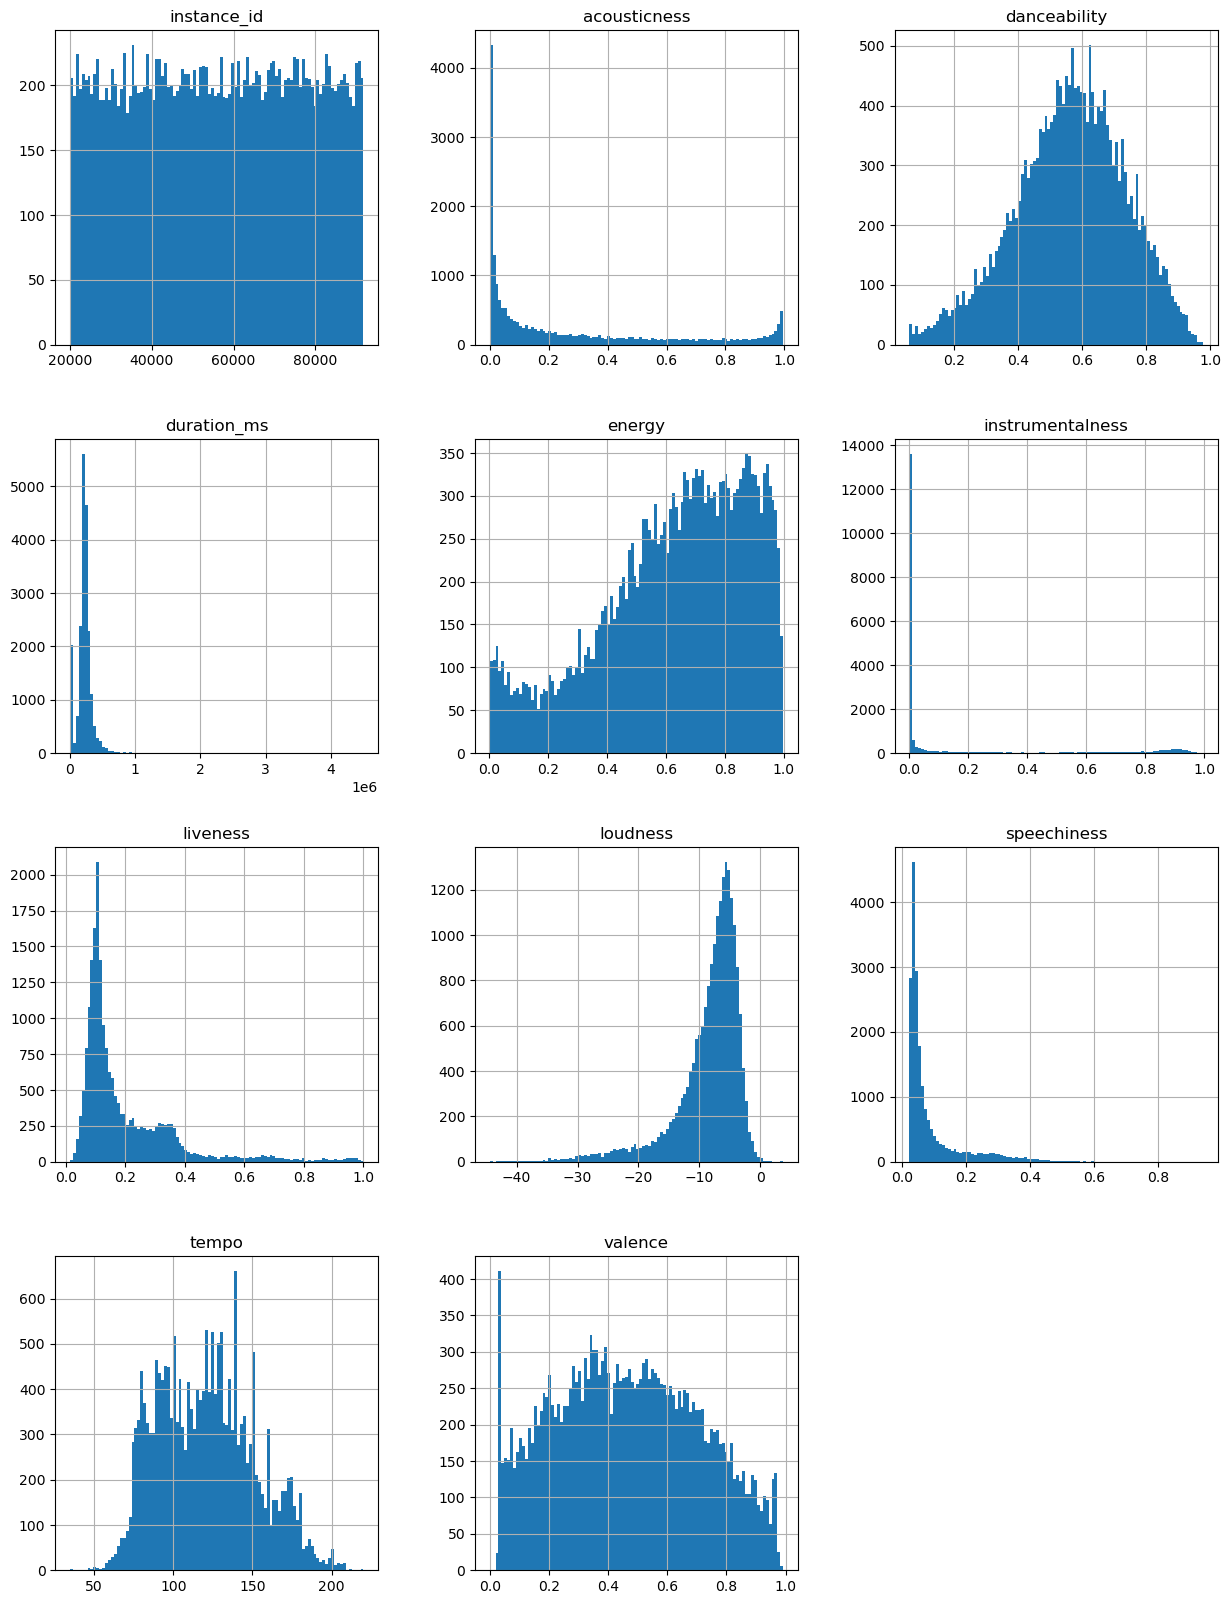

In [91]:
data_train.hist(figsize=(15, 20), bins=100)
data_train.describe()

Пропусков немного, так что строки с ними можно просто выкинуть.
Можно заметить сразу выброс в данных - отрицательная продолжительность трека, такие строки тоже необходимо выкинуть из датасета.

## Предобработка данных

### Удаление выбросов

In [92]:
data_train.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [93]:
data_train['tempo'] = data_train['tempo'].fillna(data_train['tempo'].median())

In [94]:
data_train.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo                 0
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [95]:
data_train['key'].value_counts()

G     2304
C     2149
C#    2125
D     2110
A     2013
F     1616
B     1522
E     1516
G#    1268
A#    1224
F#    1206
D#     606
Name: key, dtype: int64

In [96]:
data_train['key'] = data_train['key'].fillna('G')

In [97]:
data_train.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                506
speechiness           0
tempo                 0
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [98]:
data_train['mode'].value_counts()

Major    12828
Minor     7060
Name: mode, dtype: int64

In [99]:
data_train['mode'] = data_train['mode'].fillna('Major')

In [100]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               20394 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              20394 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             20394 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [101]:
data_train = data_train.query('duration_ms > 0')

In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18385 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       18385 non-null  float64
 1   track_name        18385 non-null  object 
 2   acousticness      18385 non-null  float64
 3   danceability      18385 non-null  float64
 4   duration_ms       18385 non-null  float64
 5   energy            18385 non-null  float64
 6   instrumentalness  18385 non-null  float64
 7   key               18385 non-null  object 
 8   liveness          18385 non-null  float64
 9   loudness          18385 non-null  float64
 10  mode              18385 non-null  object 
 11  speechiness       18385 non-null  float64
 12  tempo             18385 non-null  float64
 13  obtained_date     18385 non-null  object 
 14  valence           18385 non-null  float64
 15  music_genre       18385 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

### Генерация новых признаков

### Проверка на мультиколлинеарность

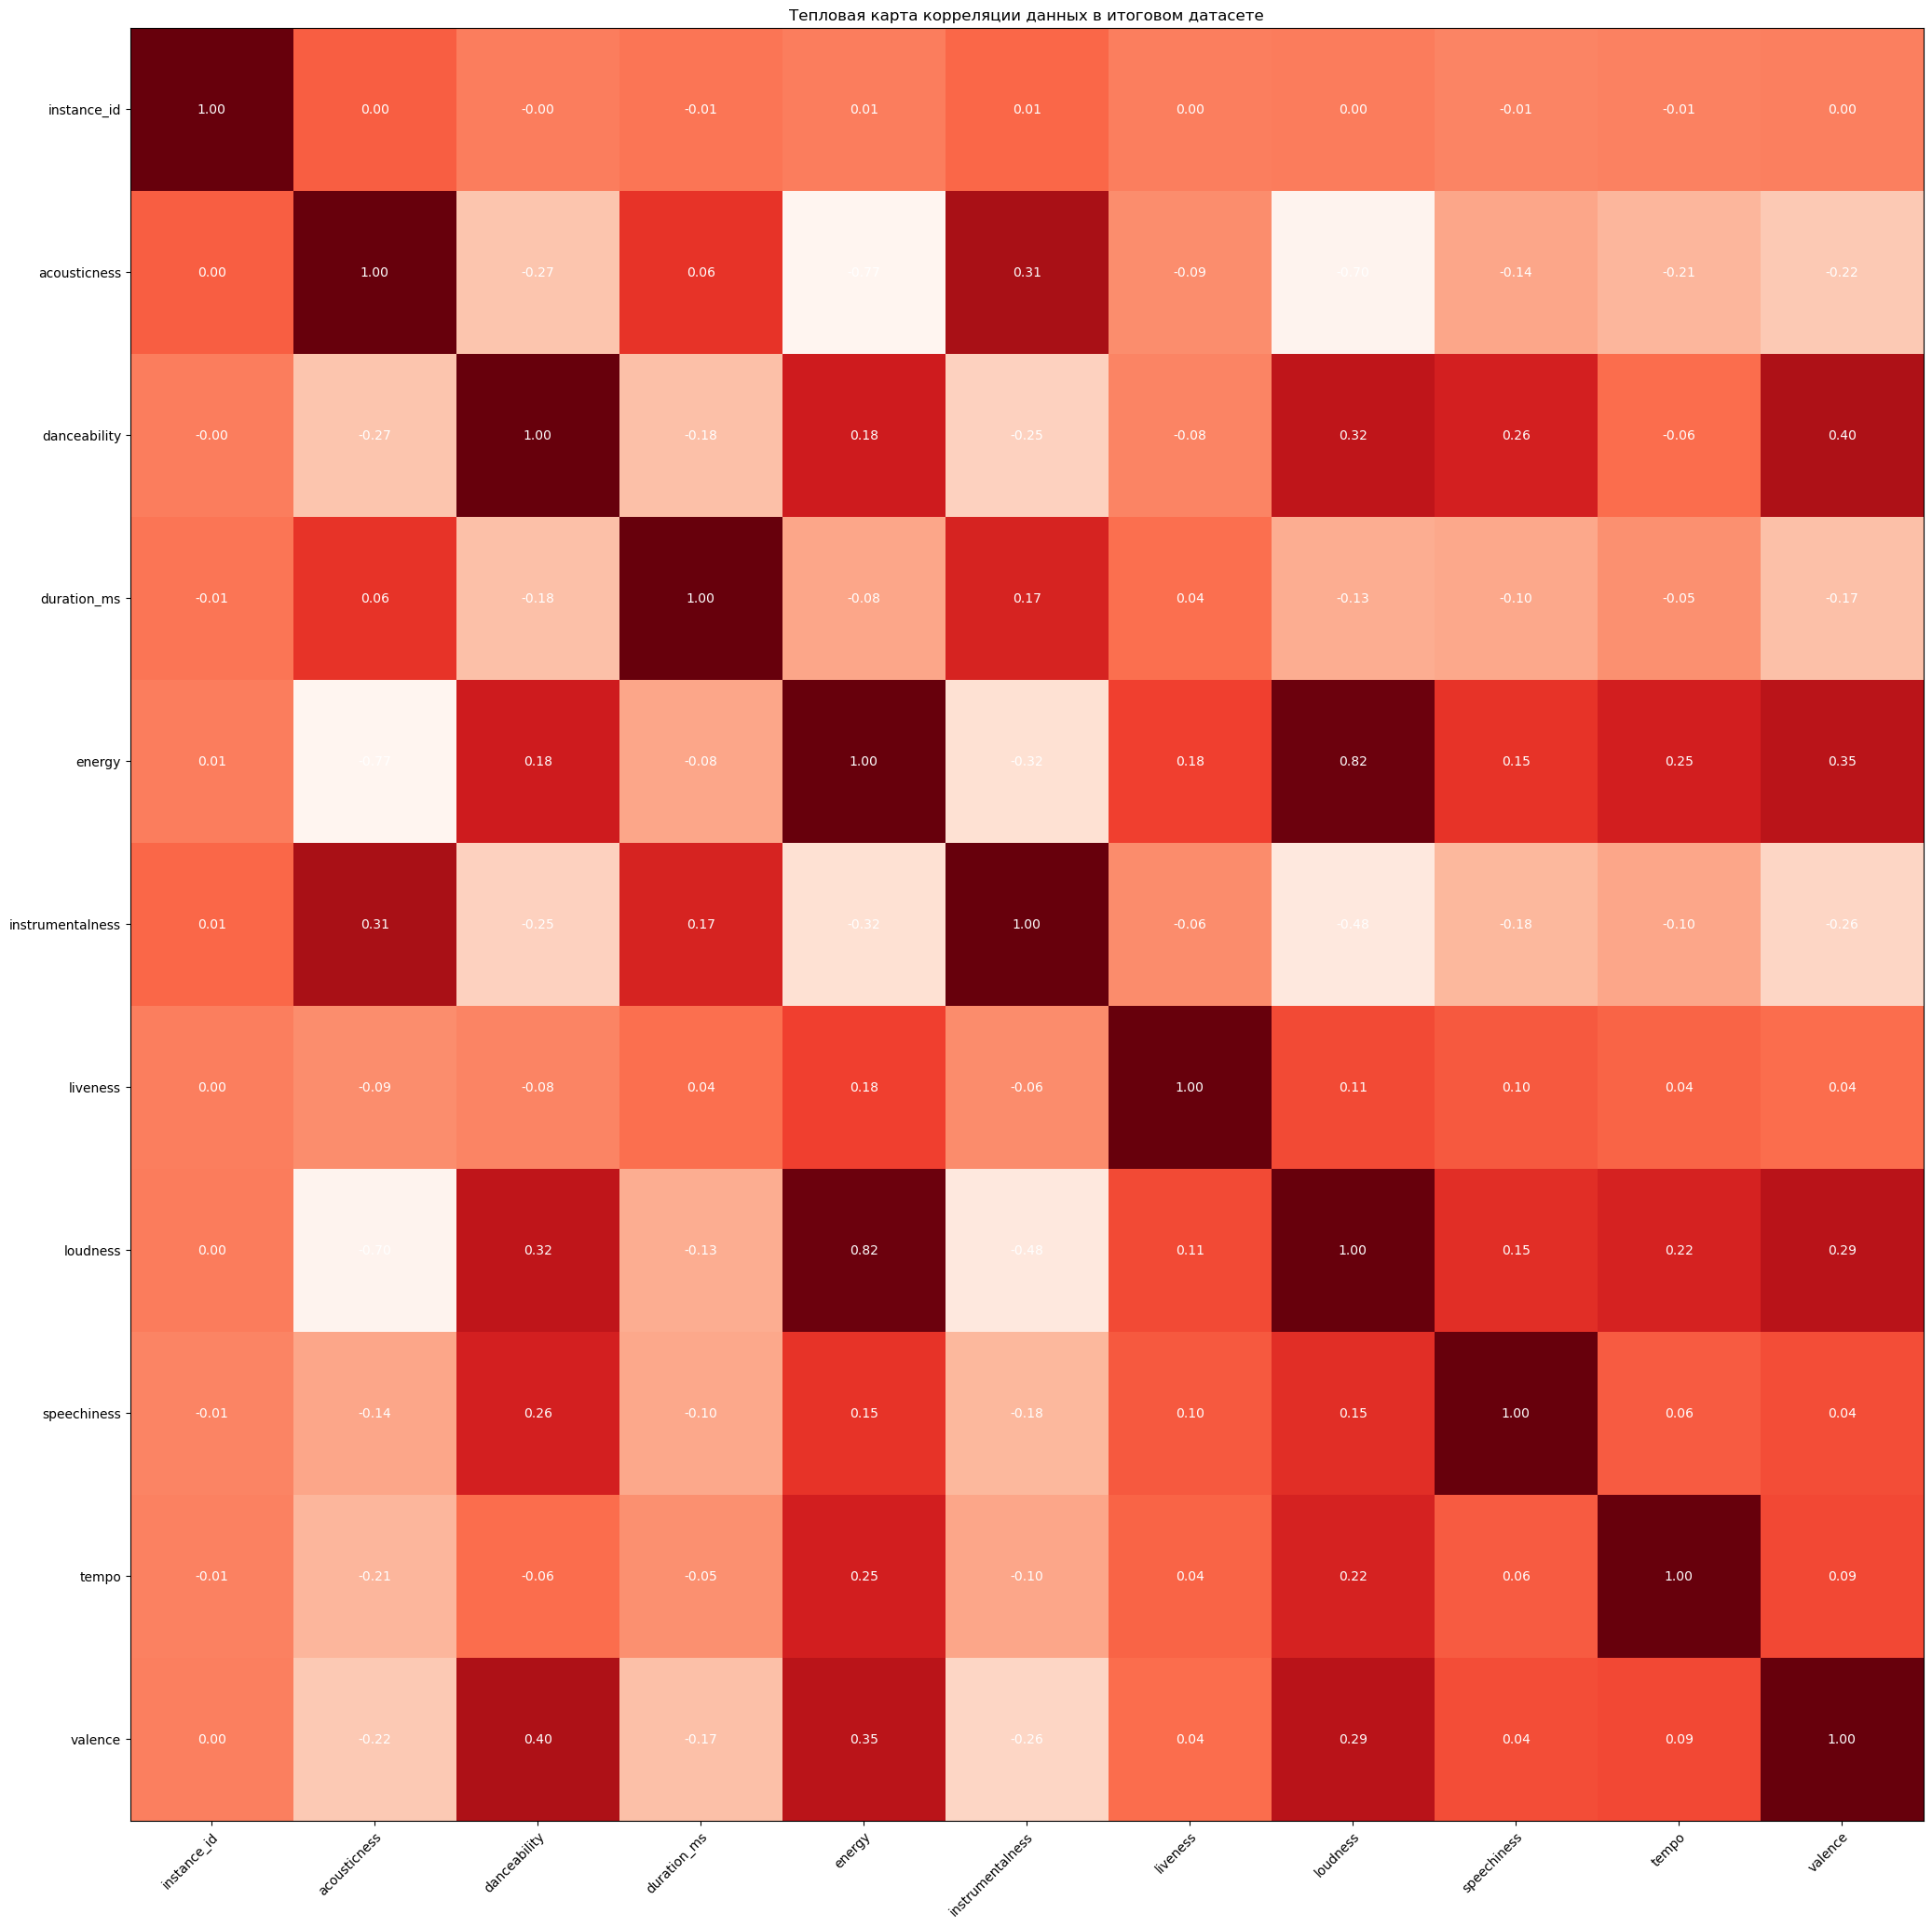

In [66]:
heatmap_data = data_train.corr()
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_xticks(np.arange(len(heatmap_data.index)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.index)
ax.set_yticklabels(heatmap_data.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title('Тепловая карта корреляции данных в итоговом датасете')
data = heatmap_data.values
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.index)):
        text = ax.text(j, i, '{:.2f}'.format(data[i, j]),
                       ha="center", va="center", color="w")
        
im = ax.imshow(heatmap_data.corr(), cmap='Reds')

По тепловой карте видно, что показатели loudness и energy сильно коррелируют - удалим из датасета один из них.

In [67]:
data_train = data_train.drop('loudness', axis=1)

## Обучение моделей

### Подготовка признаков и скорера

In [103]:
features_train = data_train.drop(['music_genre', 'instance_id', 'track_name', 'obtained_date'], axis=1)
target_train = data_train['music_genre']

In [104]:
ftwo_scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

In [105]:
numeric = list(features_train.columns)
# numeric.remove('track_name')
numeric.remove('key')
numeric.remove('mode')
# numeric.remove('obtained_date')
non_numeric = ['key', 'mode']

In [106]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

In [107]:
le = LabelEncoder()
for column in non_numeric:
    features_train[column] = le.fit_transform(features_train[column])
letarg = LabelEncoder()
target_train = letarg.fit_transform(target_train)

In [108]:
features_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.640675,0.630572,-0.565907,-1.095315,-0.466765,5,-0.501994,-1.509866,0,-0.459848,-0.647116,-0.062217
1,-0.096923,-0.637974,-0.524886,0.173170,-0.523851,0,-0.543902,0.027166,1,-0.573608,-0.258099,0.303844
2,-0.143607,-0.626336,-0.650192,0.706013,-0.524016,7,-0.106858,0.603235,1,2.867892,-1.326290,-0.498200
3,-0.679533,1.660539,0.105576,0.980388,-0.524006,11,0.755256,0.679632,1,-0.110369,-0.160370,2.060114
4,-0.146719,1.049542,-0.449802,-0.204592,-0.524011,3,-0.136793,0.544118,0,-0.435251,-1.475613,0.484818


In [109]:
target_train

array([4, 9, 0, ..., 0, 8, 5])

### LogisticRegression

In [110]:
%%time

model_reg = LogisticRegression()

print(f'''Значение метрики FBeta на обучающей выборке для LogisticRegression''', 
      cross_val_score(model_reg, features_train, target_train, 
                         cv = 5, 
                         n_jobs = -1, 
                         scoring = ftwo_scorer).mean())

Значение метрики FBeta на обучающей выборке для LogisticRegression 0.40244764753875445
Wall time: 7.26 s


### Random Forest

In [114]:
%%time

model_forest = RandomForestClassifier(random_state=575757)
params_forest = [{'n_estimators':[x for x in range(50, 501, 50)]}]
grid_forest = GridSearchCV(model_forest, params_forest, scoring=ftwo_scorer, cv=5)
grid_forest.fit(features_train, target_train)
display(grid_forest.best_score_)
display(grid_forest.best_params_)

0.4638564046777264

{'n_estimators': 500}

Wall time: 12min 23s


### CatBoost

In [115]:
%%time

model_cat = CatBoostClassifier(verbose=False, random_state=575757)
parameters_cat = {'learning_rate':[x/100 for x in range(1, 10)]}
grid_cat = GridSearchCV(model_cat, parameters_cat, cv=5, scoring=ftwo_scorer)
grid_cat.fit(features_train, target_train)
display(grid_cat.best_score_)
display(grid_cat.best_params_)

0.4839815066630405

{'learning_rate': 0.02}

Wall time: 19min 9s


### LGBM

In [116]:
%%time

model_lgbm = LGBMClassifier(random_state=575757)
params_lgbm = [{'num_leaves':[x for x in range(10,51)], 
                'learning_rate':[x/100 for x in range(1, 6)]}]
grid_lgbm = GridSearchCV(model_lgbm, params_lgbm, cv=5, scoring=ftwo_scorer)
grid_lgbm.fit(features_train, target_train)
display(grid_lgbm.best_score_)
display(grid_lgbm.best_params_)

0.47451726951319007

{'learning_rate': 0.05, 'num_leaves': 14}

Wall time: 23min 1s


## Тестирование лучшей модели

In [117]:
features_test = data_test.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
# target_test = data_test['music_genre']
numeric = list(features_test.columns)
# numeric.remove('track_name')
numeric.remove('key')
numeric.remove('mode')
# numeric.remove('obtained_date')
non_numeric = ['key', 'mode']
scaler = StandardScaler()
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
# le = LabelEncoder()
for column in non_numeric:
    features_test[column] = le.fit_transform(features_test[column])
# target_test = le.fit_transform(target_test)
# letarg = LabelEncoder()
# target_train = letarg.fit(target_train)

In [118]:
model_fin = grid_cat.best_estimator_
pred = model_fin.predict(features_test)

In [119]:
pred

array([[8],
       [2],
       [8],
       ...,
       [8],
       [5],
       [7]], dtype=int64)

In [120]:
df_res = pd.DataFrame()

In [121]:
df_res['instance_id'] = data_test['instance_id']

In [122]:
df_res['music_genre'] = letarg.inverse_transform(pred)

In [123]:
df_res.head()

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Alternative


In [125]:
df_res.to_csv('submit.csv', index=False)